# Initial Conditions Optimization
## Plot History

In [79]:
%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import ray
import io
import os
from IPython.display import display, HTML, Markdown

## Load PlayFair Display and Roboto Fonts from Google

In [80]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=28)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=20)


## Load Humor Sans Font

In [81]:
github_url = 'http://antiyawn.com/uploads/Humor-Sans-1.0.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
comic_font = fm.FontProperties(fname=f.name, size=18)

# Main code

In [82]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

## Load Initial Parameters

In [83]:
dfparam = pd.read_csv("data/param.csv")
display(dfparam)


DRS  start-date  prediction-range         s0  \
0        DRS 01 - Grande São Paulo  2020-03-20               200  2000000.0   
1               DRS 02 - Araçatuba  2020-04-01               150      500.0   
2              DRS 03 - Araraquara  2020-04-01               150     2000.0   
3        DRS 04 - Baixada Santista  2020-04-01               150     8000.0   
4                DRS 05 - Barretos  2020-04-01               150     2000.0   
5                   DRS 06 - Bauru  2020-04-01               150    10000.0   
6                DRS 07 - Campinas  2020-04-01               150    20000.0   
7                  DRS 08 - Franca  2020-04-01               150     1000.0   
8                 DRS 09 - Marília  2020-04-01               150     5000.0   
9              DRS 10 - Piracicaba  2020-04-01               150    10000.0   
10    DRS 11 - Presidente Prudente  2020-04-01               150     1000.0   
11               DRS 12 - Registro  2020-04-01               150     1000.0   
12         DRS 13 - Ribeirão Preto  2020-04-01               150     5000.0   
13  DRS 14 - São João da Boa Vista  2020-04-01               150     2000.0   
14  DRS 15 - São José do Rio Preto  2020-04-01               150    10000.0   
15               DRS 16 - Sorocaba  2020-04-01               150     1200.0   
16                DRS 17 - Taubaté  2020-04-01               150    10000.0   

        e0      a0        i0        r0        d0  START  RATIO  WCASES  WREC  
0   0.0001  0.0001  800.0000  300.0000  400.0000      0   0.15    0.15  0.05  
1   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
2   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
3   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
4   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
5   0.0001  0.0001    4.0000    0.0001    0.0001      0   0.10    0.40  0.10  
6   0.0001  0.0001   40.0000    0.0001    0.0001      0   0.10    0.40  0.10  
7   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
8   0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
9   0.0001  0.0001    0.0001    0.0001    1.0000      0   0.10    0.40  0.10  
10  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
11  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
12  0.0001  0.0001    0.0001    0.0001    0.0001      5   0.10    0.40  0.10  
13  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
14  0.0001  0.0001    0.0001    0.0001    0.0001      0   0.10    0.40  0.10  
15  0.0001  0.0001    2.0000    0.0001    0.0001      0   0.10    0.40  0.10  
16  0.0001  0.0001   17.0000    0.0001    2.0000      0   0.10    0.40  0.10

## Select data set

In [84]:
opt=0

#select history file version, model and states
if opt==0:
    version=105
    model="Yabox"
    DRS=dfparam.DRS
    

In [85]:
strFile="results/IC_optimizeddistrictRegions"+str(version)+".csv"
if os.path.isfile(strFile):
    os.remove(strFile)

## Plot and Save Results

# Results for DRS 01 - Grande São Paulo District Region

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
49  4.748296e+08 2020-03-19            0  2392197  1456  269  0.4498  0.0321

## 5 Lowest Results DRS 01 - Grande São Paulo District Region

gtot  startdate  startNcases       s0    i0   d0  wcases    wrec
49  4.748296e+08 2020-03-19            0  2392197  1456  269  0.4498  0.0321
42  1.081621e+09 2020-03-18            0  1661110  1346  378  0.4150  0.0230
60  2.749965e+11 2020-03-19            0  2067935  1269  294  0.3840  0.0241
26  9.315555e+11 2020-03-19            0  1650027  1572  126  0.4564  0.0391
43  1.058410e+12 2020-03-19            0  1629024   537  261  0.3721  0.0320

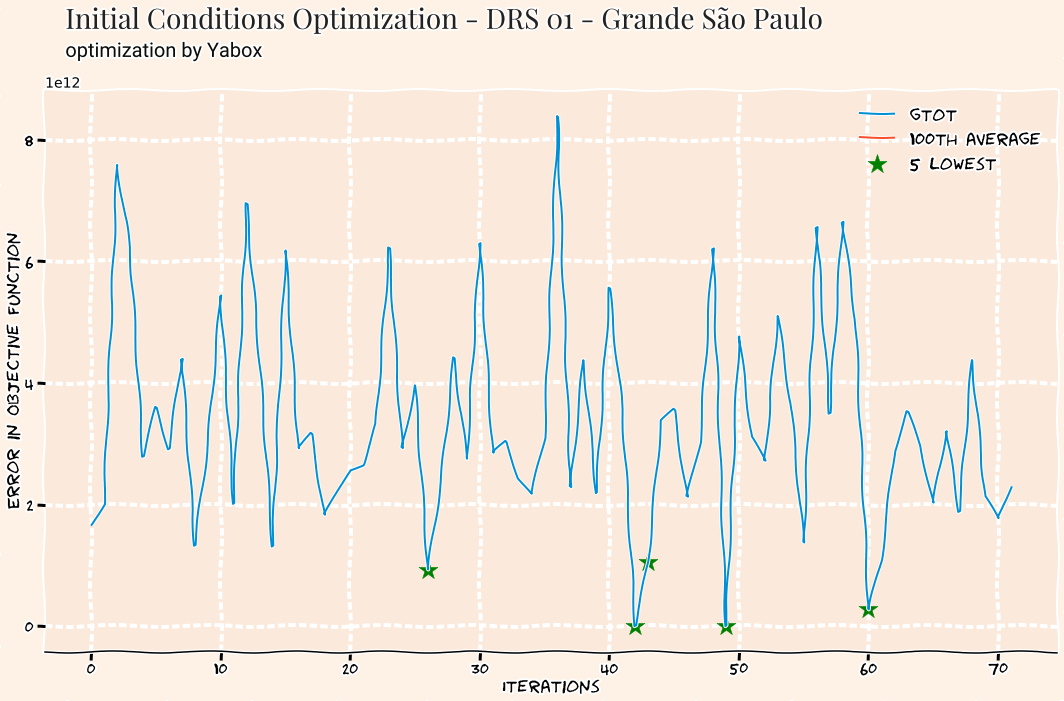

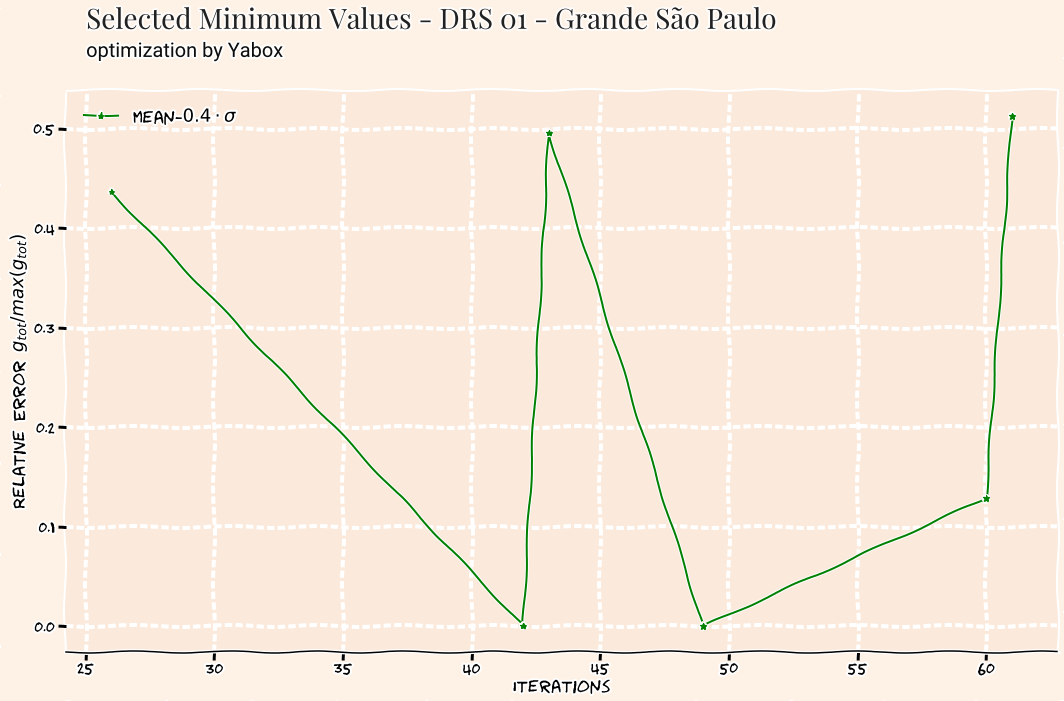

# Results for DRS 02 - Araçatuba District Region

gtot  startdate  startNcases   s0  i0  d0  wcases   wrec
75  149968.265767 2020-03-31            0  743   0   0  0.3667  0.071

## 5 Lowest Results DRS 02 - Araçatuba District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
75  149968.265767 2020-03-31            0  743   0   0  0.3667  0.0710
40  196062.498822 2020-04-01            0  743   0   0  0.3278  0.0710
87  284979.946440 2020-04-01            0  661   0   0  0.3618  0.0693
59  345876.551780 2020-04-02            0  712   0   0  0.3727  0.0630
98  360047.323941 2020-04-01            0  687   0   0  0.3313  0.0601

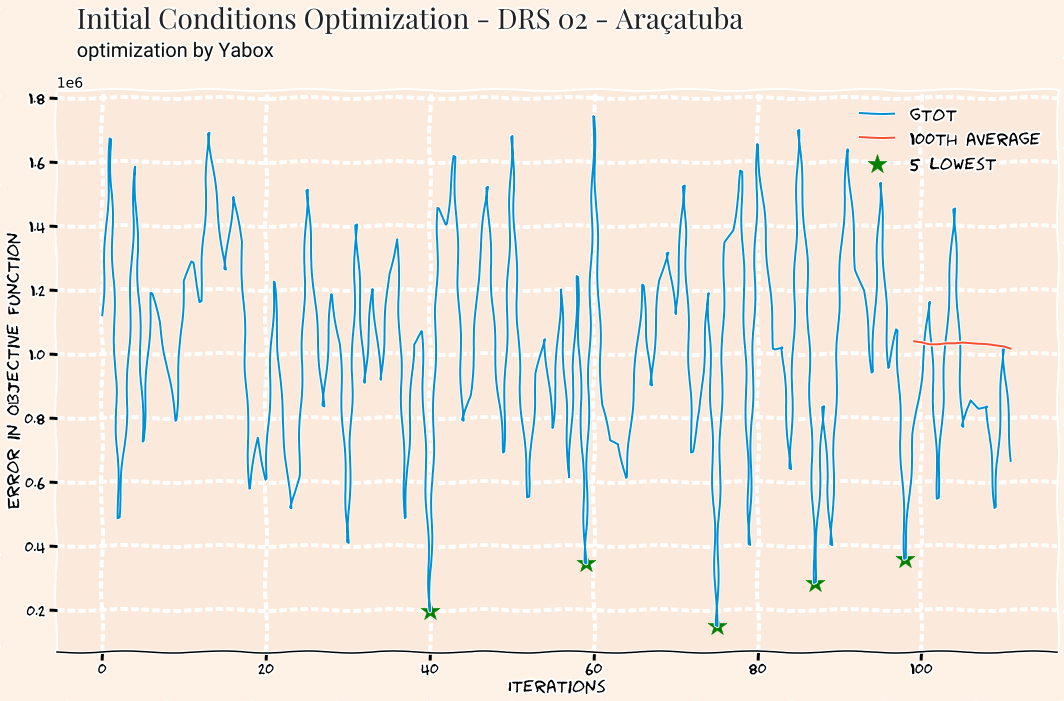

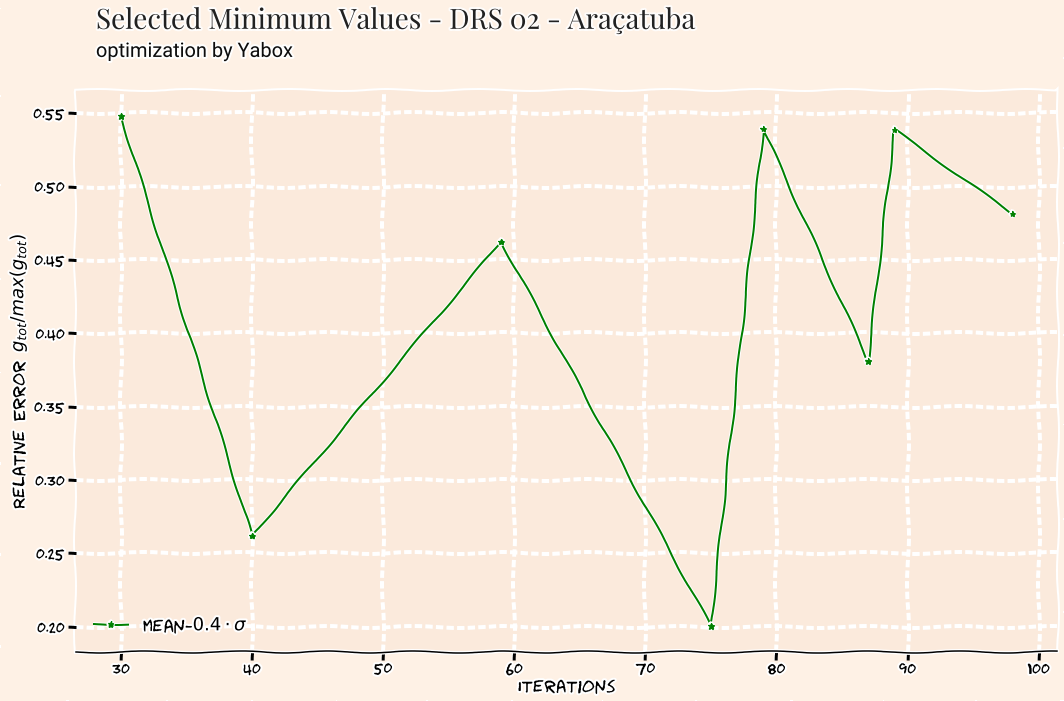

# Results for DRS 03 - Araraquara District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
112  248722.310272 2020-04-02            0  2136   0   0  0.5902  0.0231

## 5 Lowest Results DRS 03 - Araraquara District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
112  248722.310272 2020-04-02            0  2136   0   0  0.5902  0.0231
75   691872.140808 2020-03-31            0  2102   0   0  0.3112  0.0413
9    775051.931446 2020-03-30            0  2013   0   0  0.3581  0.0273
4    865336.257302 2020-04-01            0  2464   0   0  0.4177  0.0504
85   866126.223715 2020-03-30            0  2433   0   0  0.4170  0.0388

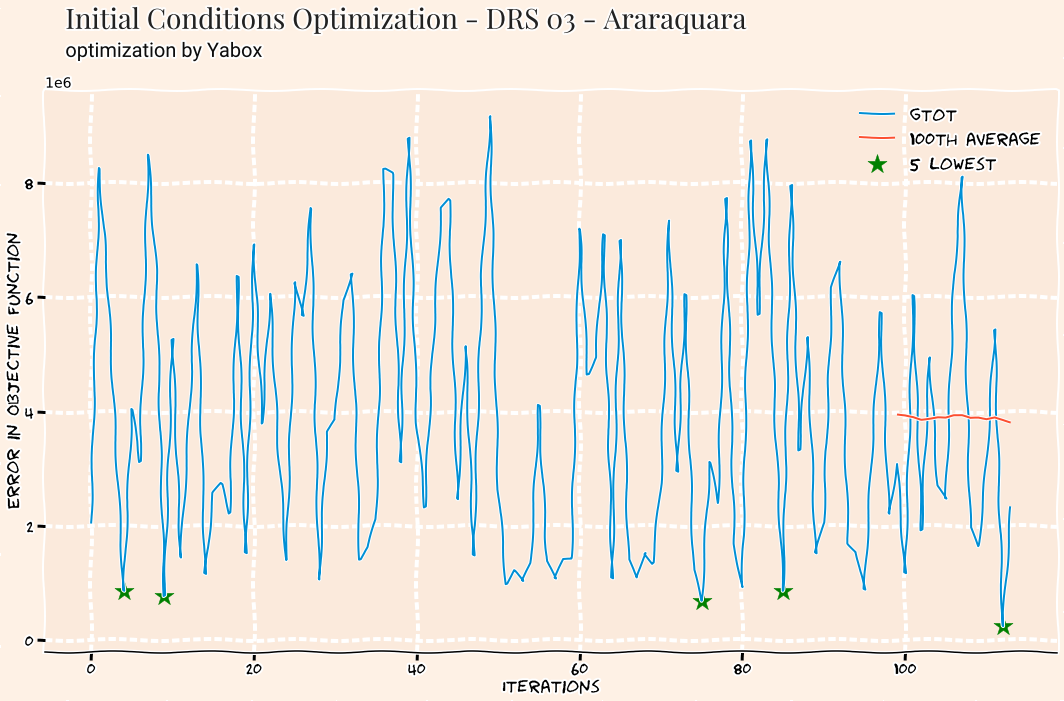

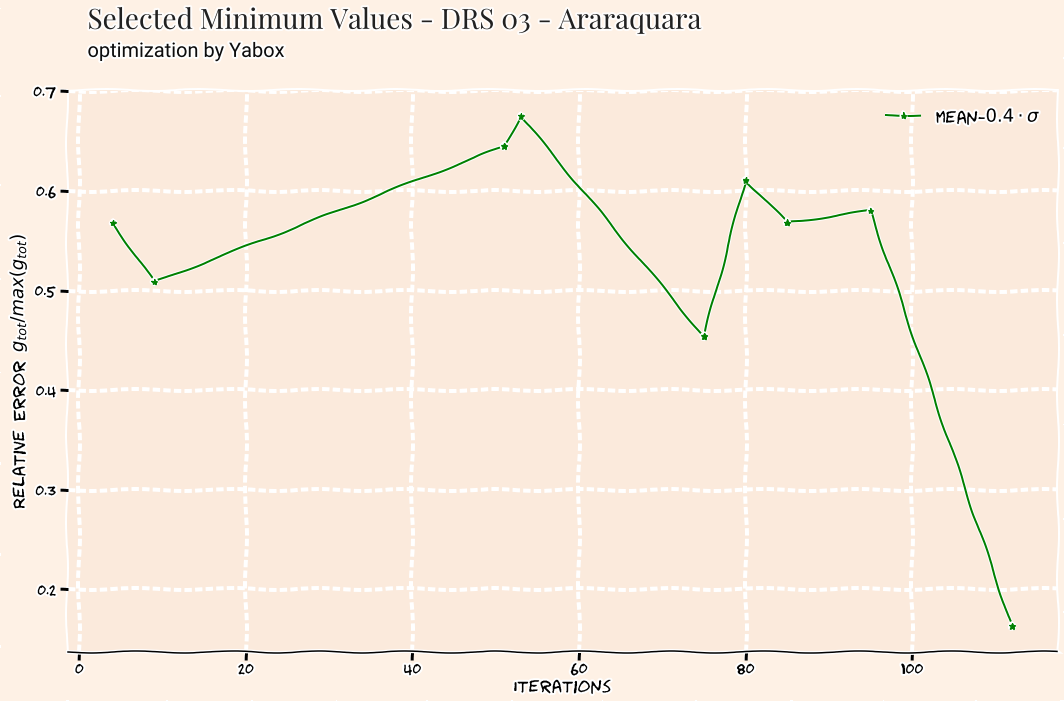

# Results for DRS 04 - Baixada Santista District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
32  2.189504e+06 2020-03-31            0  8527   0   0  0.5257  0.0735

## 5 Lowest Results DRS 04 - Baixada Santista District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
32  2.189504e+06 2020-03-31            0   8527   0   0  0.5257  0.0735
65  8.694320e+06 2020-03-31            0   9515   0   0  0.6213  0.0701
87  9.821148e+06 2020-04-01            0  10284   0   0  0.6567  0.0261
33  1.077485e+07 2020-04-01            0  11125   0   0  0.5371  0.0535
45  1.172273e+07 2020-04-01            0   7746   0   0  0.4195  0.0566

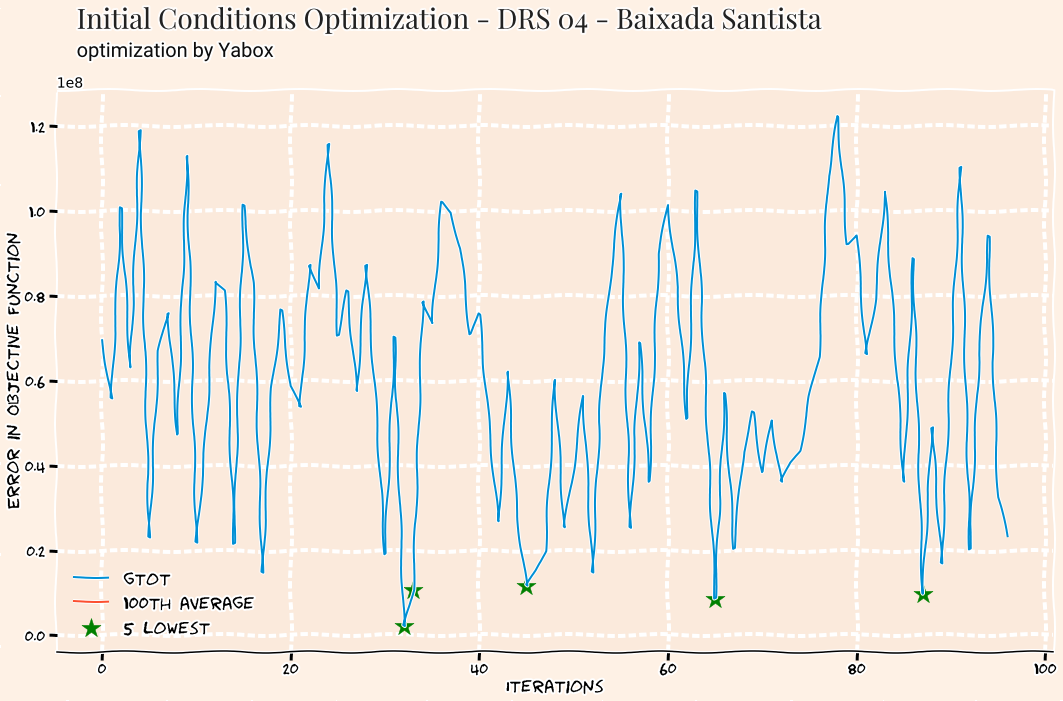

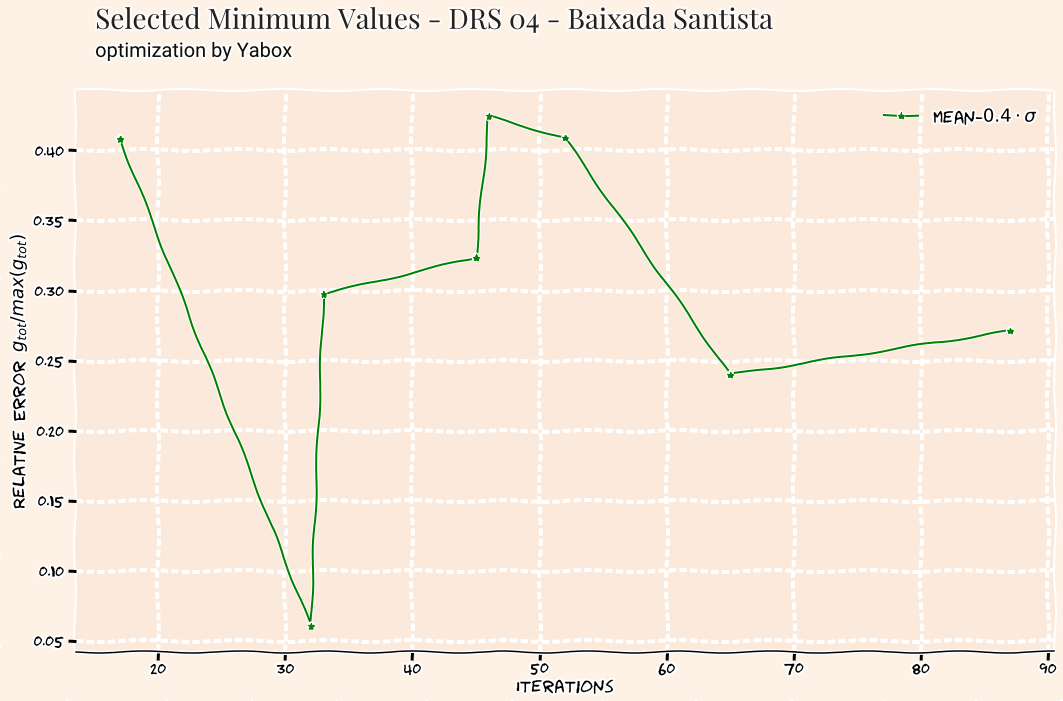

# Results for DRS 05 - Barretos District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
9  306251.633624 2020-03-30            0  2691   0   0  0.3185  0.0686

## 5 Lowest Results DRS 05 - Barretos District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
9    306251.633624 2020-03-30            0  2691   0   0  0.3185  0.0686
60   332410.912582 2020-04-02            0  2616   0   0  0.3426  0.0411
25   332422.206274 2020-03-31            0  2616   0   0  0.3426  0.0537
112  345402.549390 2020-04-02            0  2282   0   0  0.3196  0.0383
97   367713.107137 2020-04-01            0  2587   0   0  0.3774  0.0368

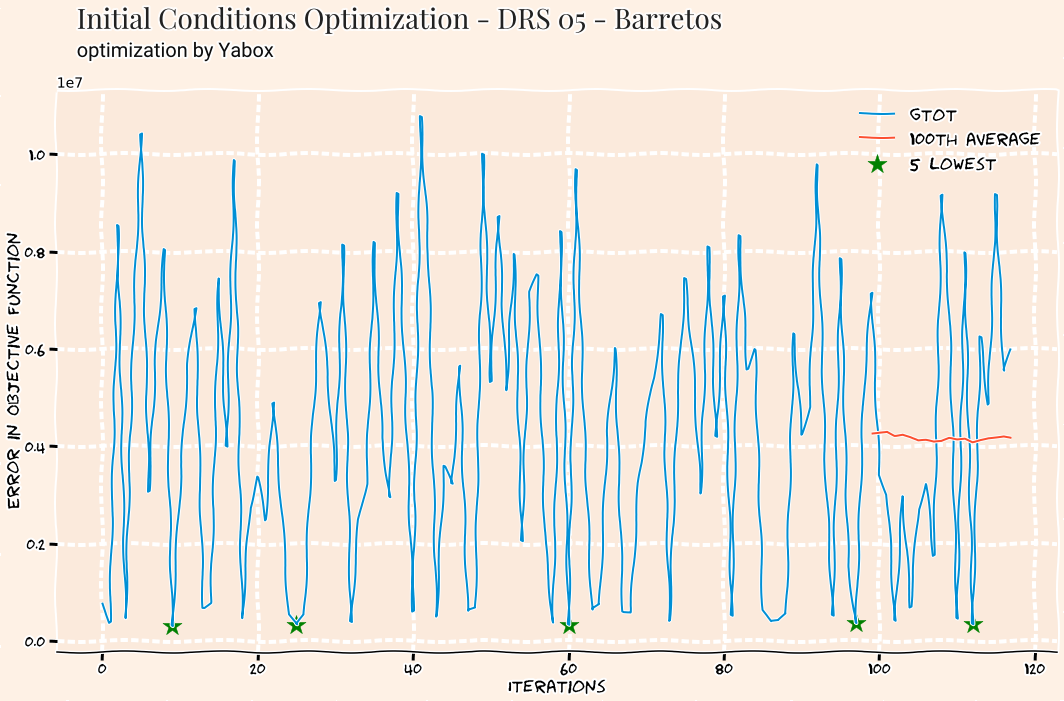

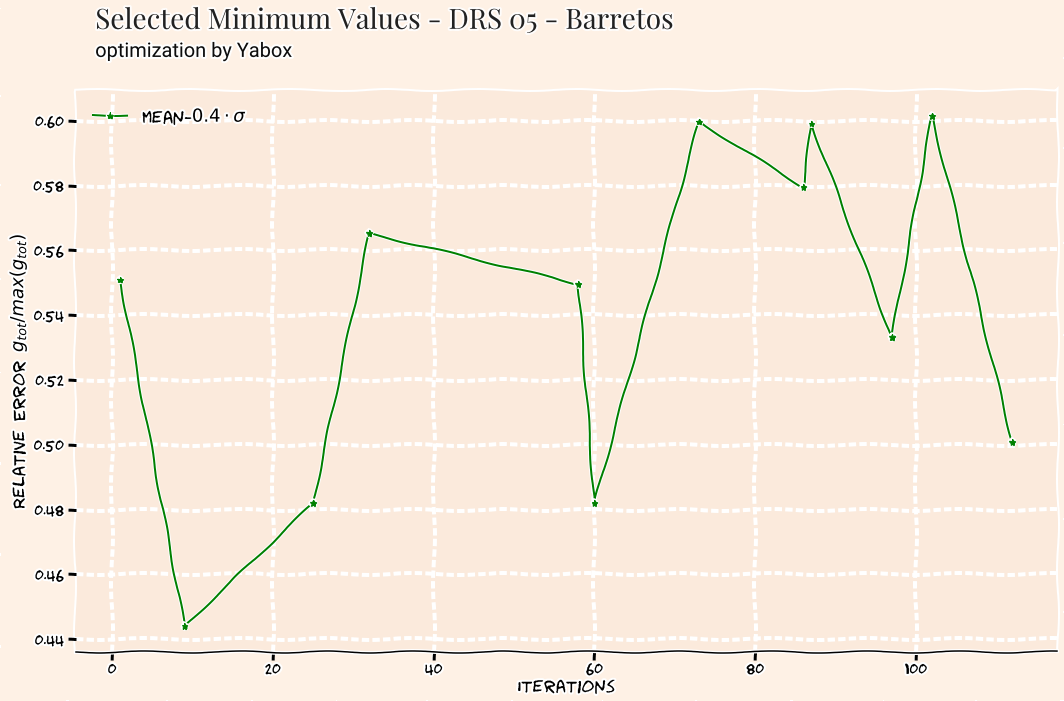

# Results for DRS 06 - Bauru District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
37  2.753309e+06 2020-04-02            0  13039   2   0  0.3072  0.0651

## 5 Lowest Results DRS 06 - Bauru District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
37  2.753309e+06 2020-04-02            0  13039   2   0  0.3072  0.0651
10  3.644899e+06 2020-04-01            0  13528   6   0  0.3985  0.0366
36  3.956839e+06 2020-03-31            0  14730   3   0  0.4180  0.0654
56  2.037886e+07 2020-03-31            0  12036   3   0  0.3918  0.0401
8   2.703427e+07 2020-04-01            0   8527   5   0  0.4918  0.0503

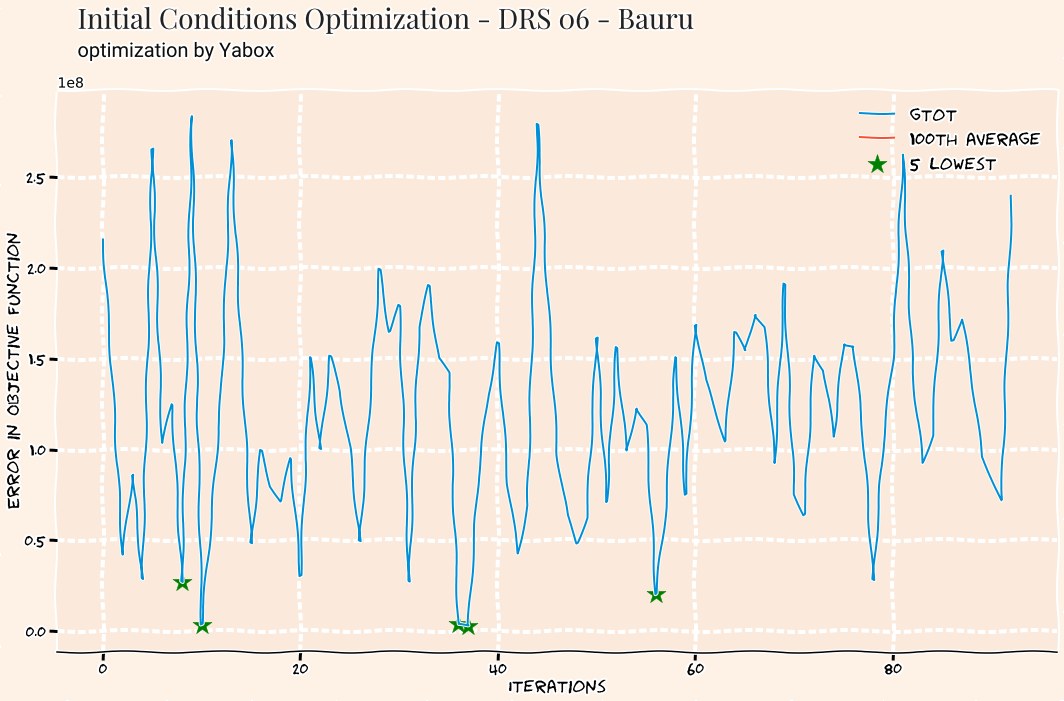

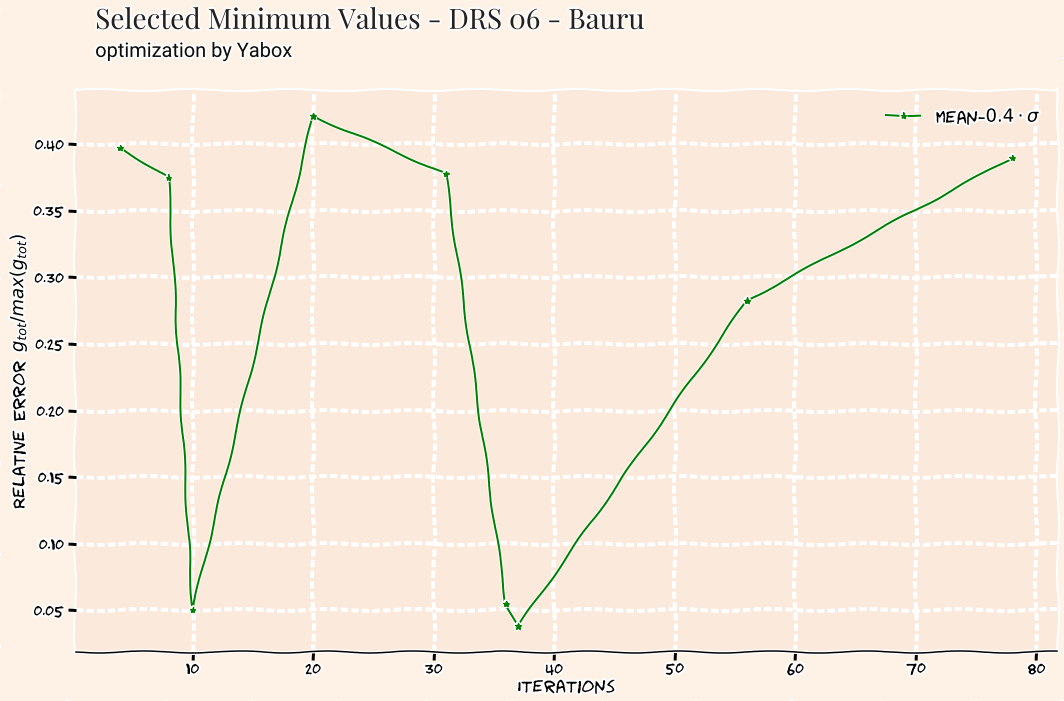

# Results for DRS 07 - Campinas District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
7  8.402628e+06 2020-04-01            0  25415  61   0  0.4167  0.0331

## 5 Lowest Results DRS 07 - Campinas District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
7   8.402628e+06 2020-04-01            0  25415  61   0  0.4167  0.0331
55  8.968033e+06 2020-04-02            0  16712  47   0  0.6483  0.0239
69  1.146212e+07 2020-03-30            0  20279  33   0  0.6801  0.0448
51  2.397902e+07 2020-03-30            0  23180  32   0  0.6163  0.0270
33  3.820836e+07 2020-03-31            0  22857  64   0  0.5878  0.0220

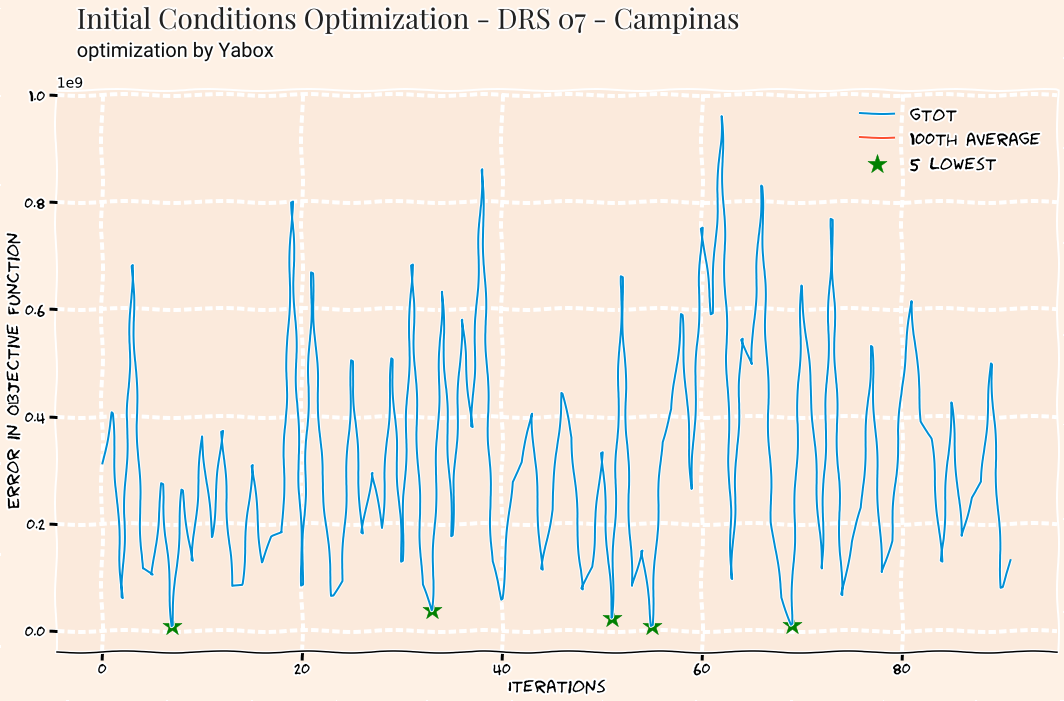

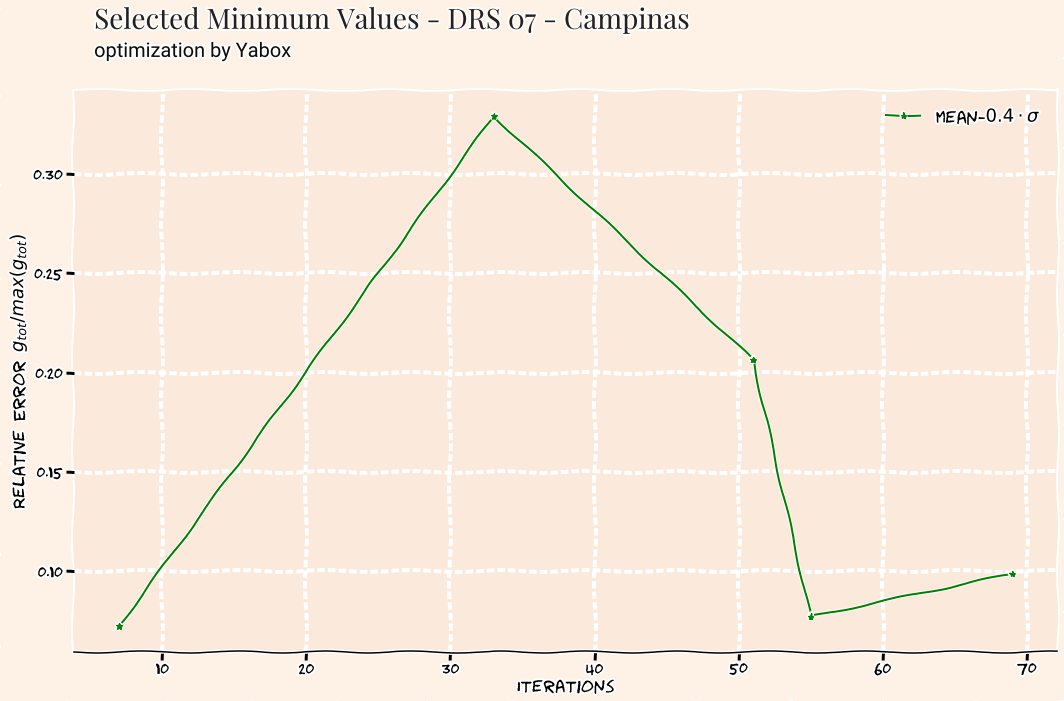

# Results for DRS 08 - Franca District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
8  27432.13171 2020-04-01            0  1044   0   0  0.7238  0.0538

## 5 Lowest Results DRS 08 - Franca District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
8    27432.131710 2020-04-01            0  1044   0   0  0.7238  0.0538
48  146361.137117 2020-04-02            0  1336   0   0  0.3271  0.0304
83  150316.943604 2020-03-31            0  1202   0   0  0.3271  0.0436
56  151520.292448 2020-03-30            0   923   0   0  0.3121  0.0427
36  174534.387544 2020-03-30            0  1144   0   0  0.3754  0.0206

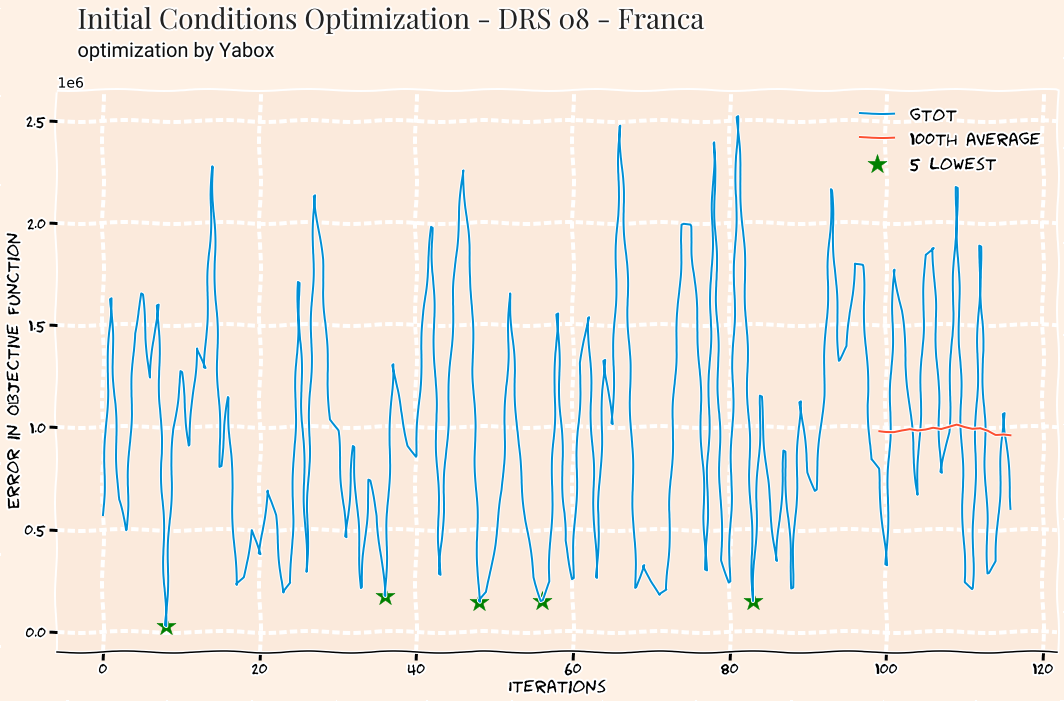

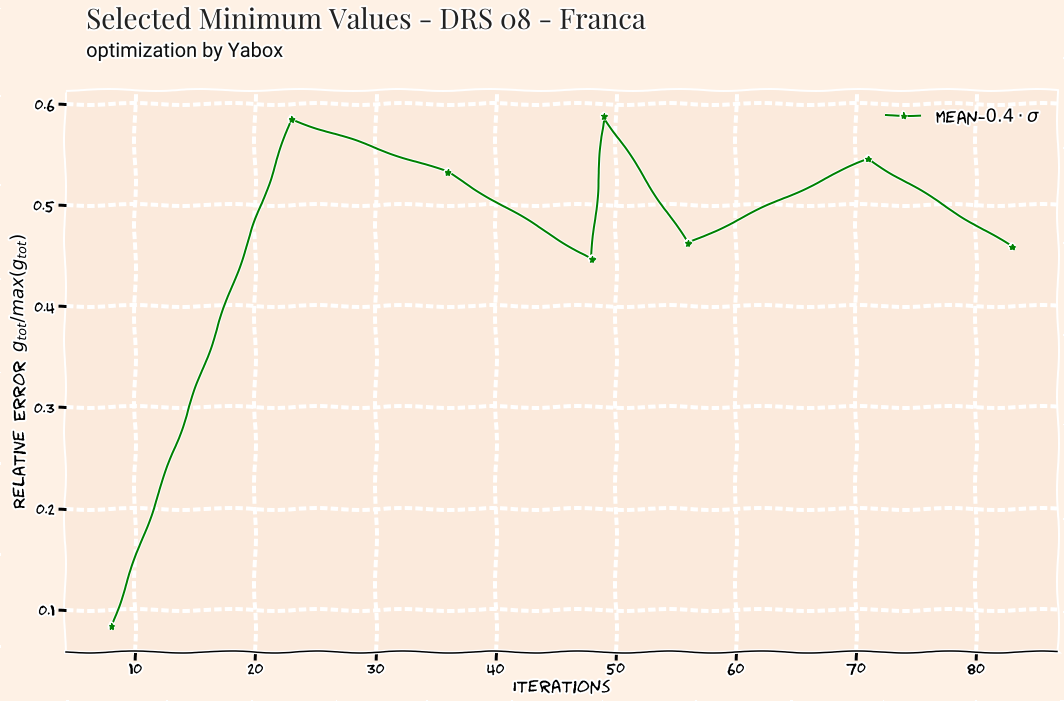

# Results for DRS 09 - Marília District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
37  175491.348165 2020-04-01            0  5495   0   0  0.5739  0.0522

## 5 Lowest Results DRS 09 - Marília District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
37  175491.348165 2020-04-01            0  5495   0   0  0.5739  0.0522
59  221247.356744 2020-04-01            0  7335   0   0  0.5467  0.0360
33  301790.027262 2020-03-30            0  7498   0   0  0.4721  0.0704
58  305379.429979 2020-04-02            0  5115   0   0  0.3388  0.0346
7   318381.749271 2020-04-02            0  7343   0   0  0.4867  0.0474

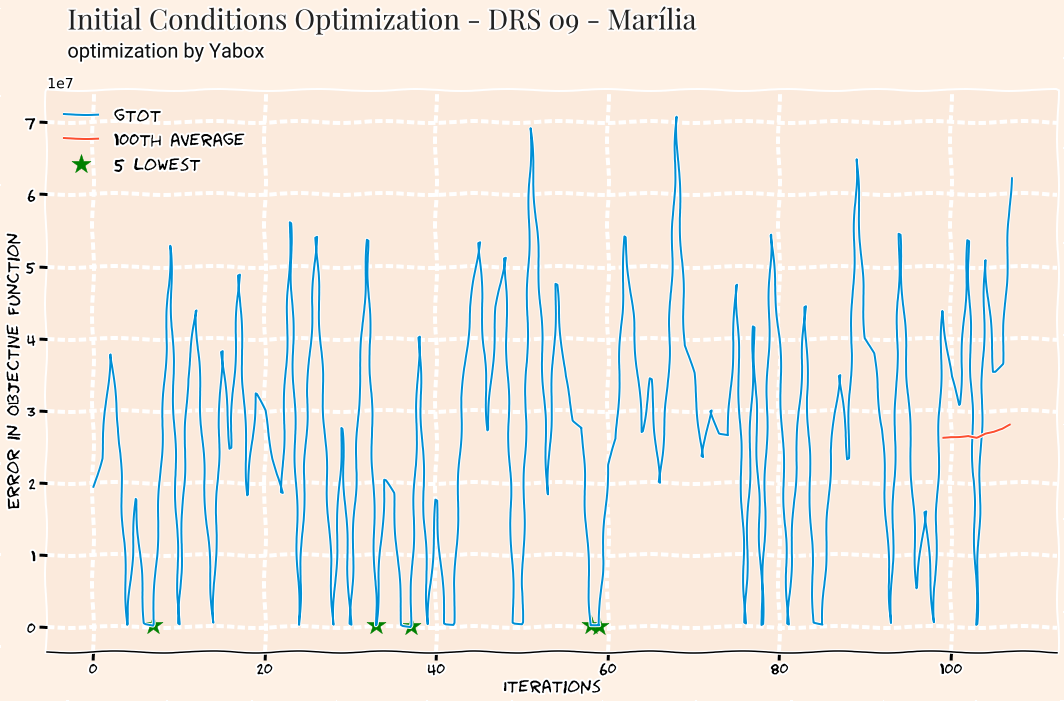

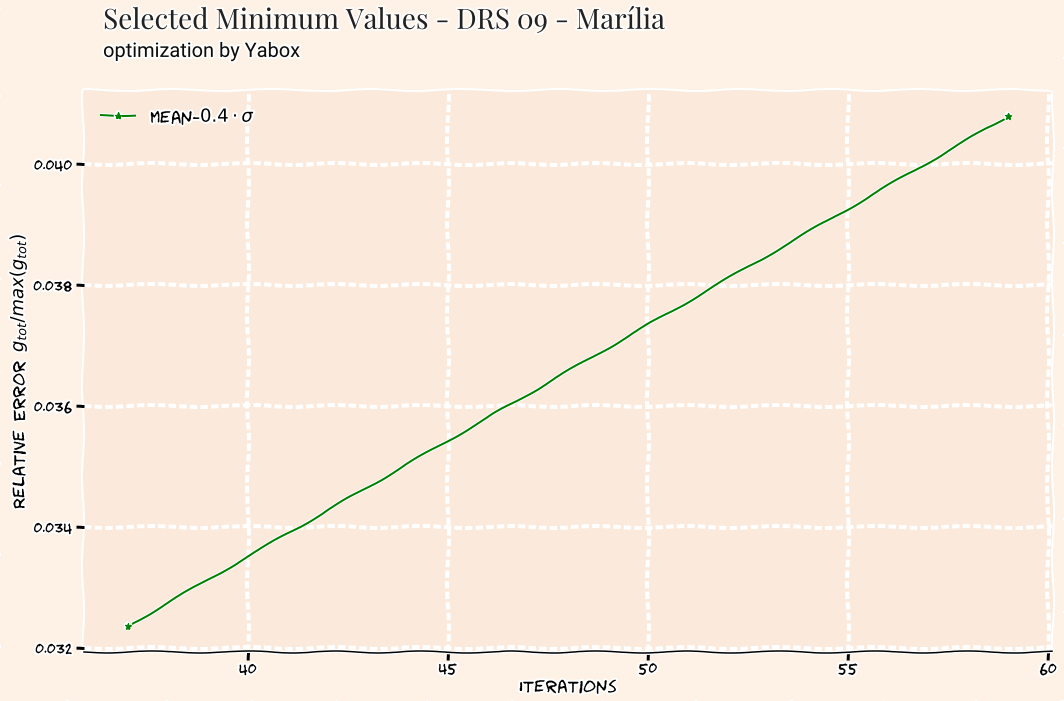

# Results for DRS 10 - Piracicaba District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
68  4.730162e+06 2020-03-30            0  13658   0   0  0.3415  0.0542

## 5 Lowest Results DRS 10 - Piracicaba District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
68  4.730162e+06 2020-03-30            0  13658   0   0  0.3415  0.0542
48  4.765836e+06 2020-03-30            0  12644   0   0  0.3184  0.0755
5   5.209255e+06 2020-04-02            0  13560   0   1  0.3581  0.0569
13  5.420463e+06 2020-03-30            0  10450   0   0  0.3184  0.0755
4   5.445678e+06 2020-04-02            0   9595   0   0  0.3282  0.0678

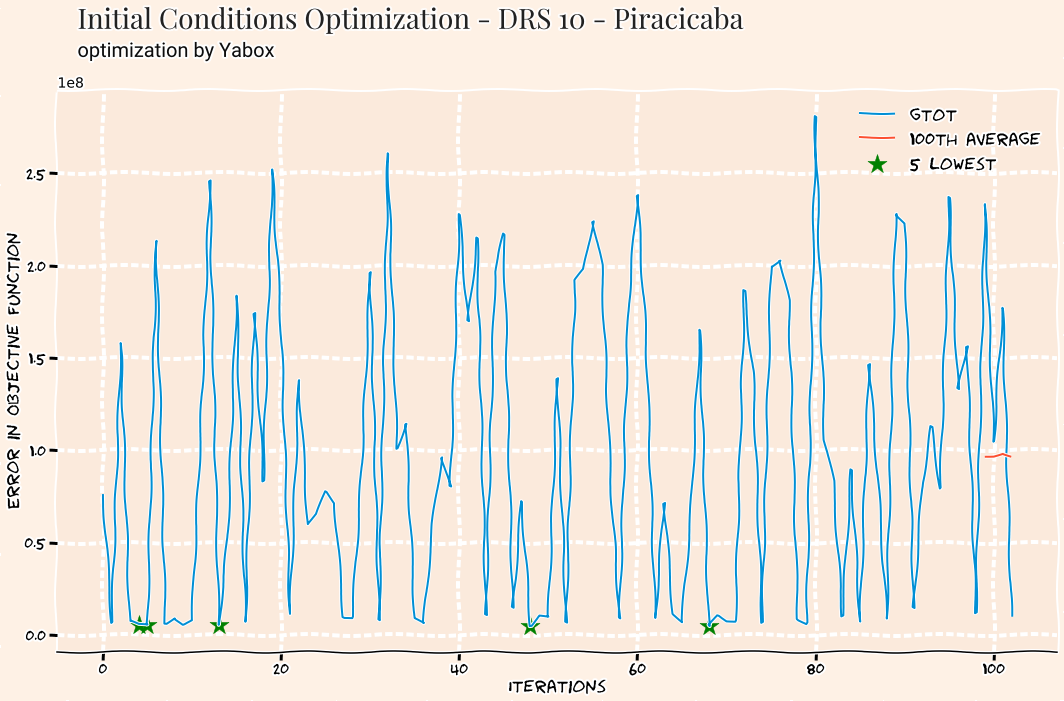

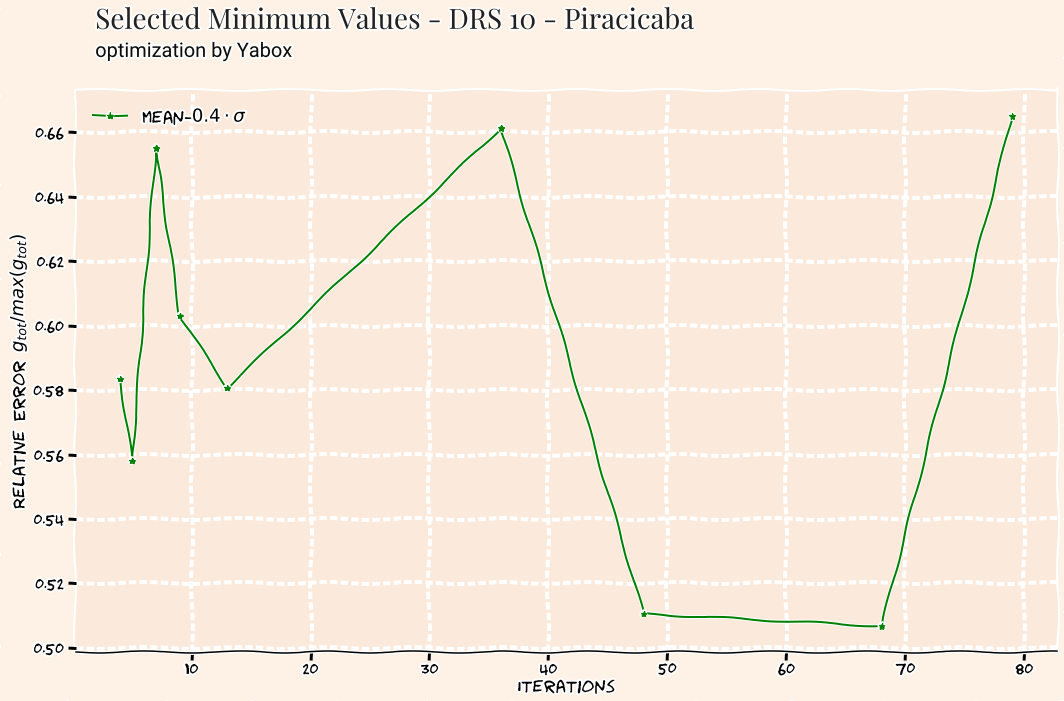

# Results for DRS 11 - Presidente Prudente District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
93  53888.324388 2020-03-31            0  1326   0   0  0.4432  0.0346

## 5 Lowest Results DRS 11 - Presidente Prudente District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
93   53888.324388 2020-03-31            0  1326   0   0  0.4432  0.0346
61  103524.555253 2020-04-02            0   906   0   0  0.7362  0.0373
76  108794.897217 2020-04-02            0   907   0   0  0.7358  0.0542
16  266906.269322 2020-03-30            0   985   0   0  0.3072  0.0513
73  282033.030679 2020-04-01            0   956   0   0  0.6529  0.0648

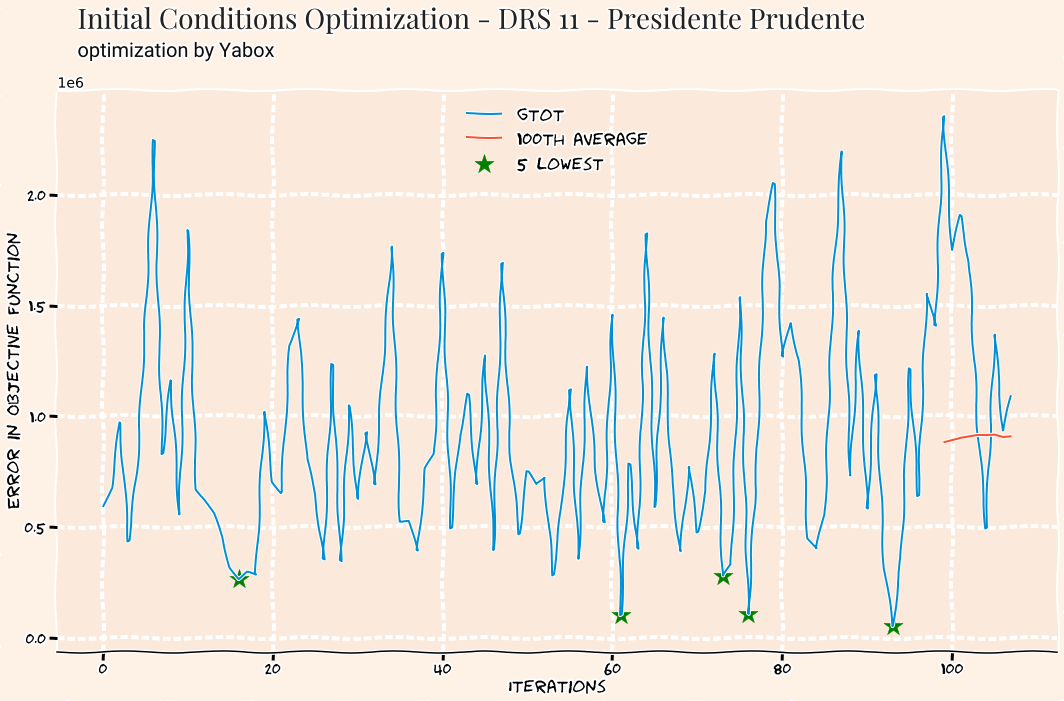

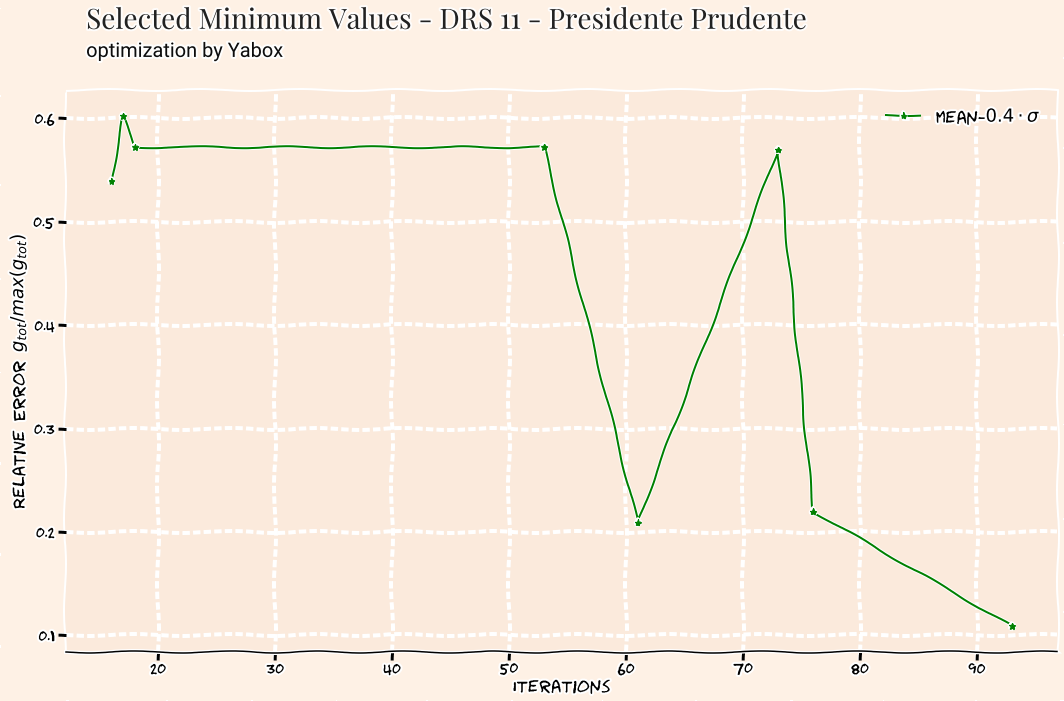

# Results for DRS 12 - Registro District Region

gtot  startdate  startNcases   s0  i0  d0  wcases    wrec
45  144725.187492 2020-04-01            0  907   0   0  0.3971  0.0646

## 5 Lowest Results DRS 12 - Registro District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
45  144725.187492 2020-04-01            0   907   0   0  0.3971  0.0646
39  146239.712375 2020-03-31            0  1466   0   0  0.5516  0.0311
70  188247.655498 2020-04-02            0  1393   0   0  0.3536  0.0791
38  188260.415278 2020-04-01            0  1250   0   0  0.3443  0.0288
23  191016.056561 2020-04-01            0   802   0   0  0.3216  0.0253

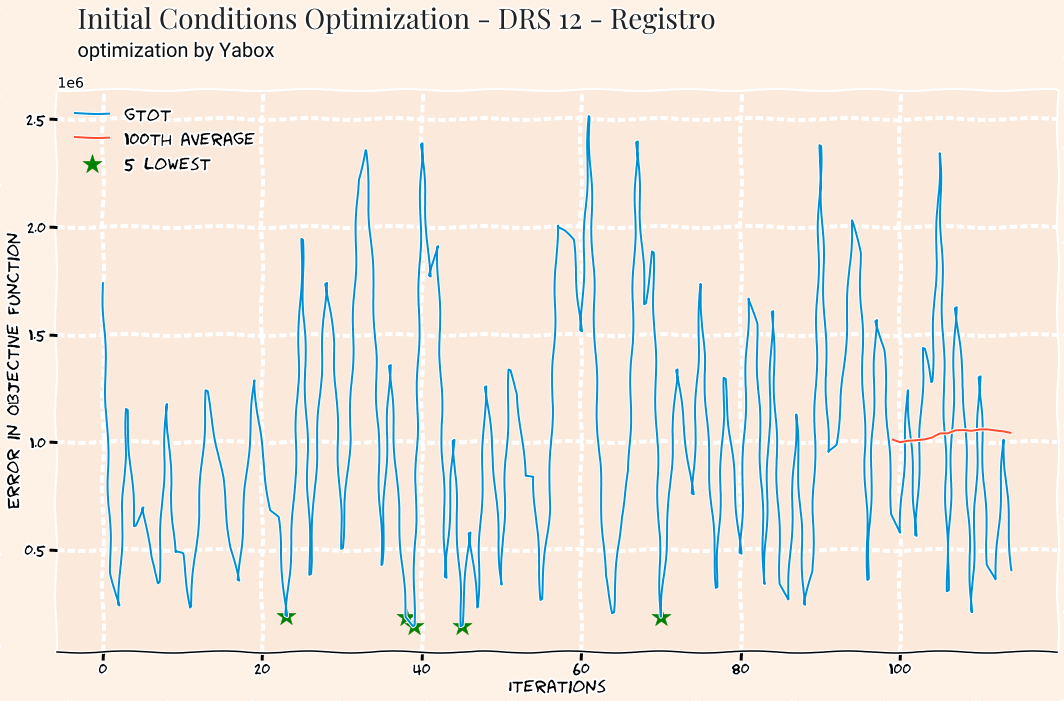

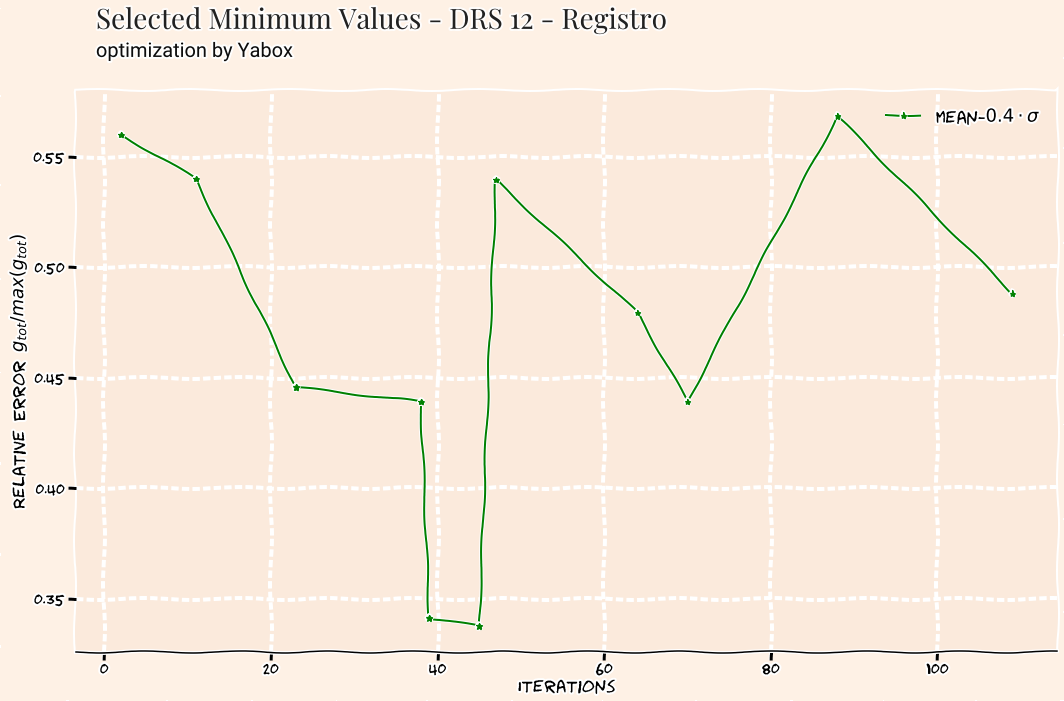

# Results for DRS 13 - Ribeirão Preto District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
89  3.472162e+06 2020-04-01            3  4027   0   0  0.7627  0.0559

## 5 Lowest Results DRS 13 - Ribeirão Preto District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
89  3.472162e+06 2020-04-01            3  4027   0   0  0.7627  0.0559
26  4.391571e+06 2020-04-02            1  4342   0   0  0.7005  0.0354
55  4.754769e+06 2020-03-31            3  5536   0   0  0.5446  0.0527
14  4.874039e+06 2020-03-31            4  4355   0   0  0.6832  0.0520
29  5.781510e+06 2020-04-02            0  5607   0   0  0.6878  0.0484

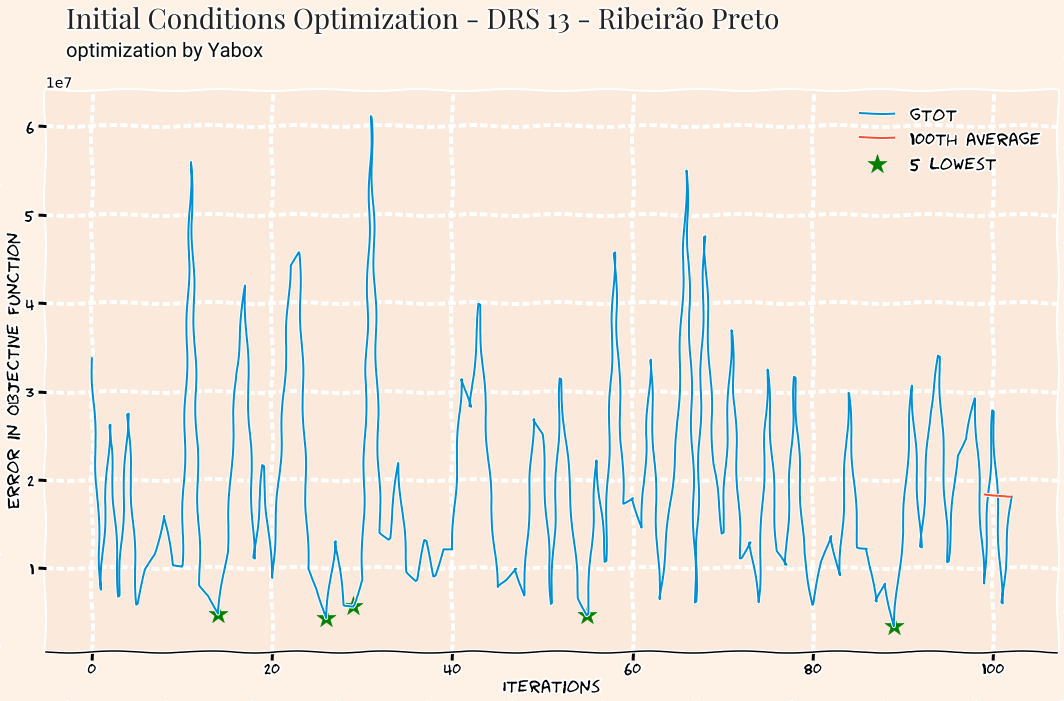

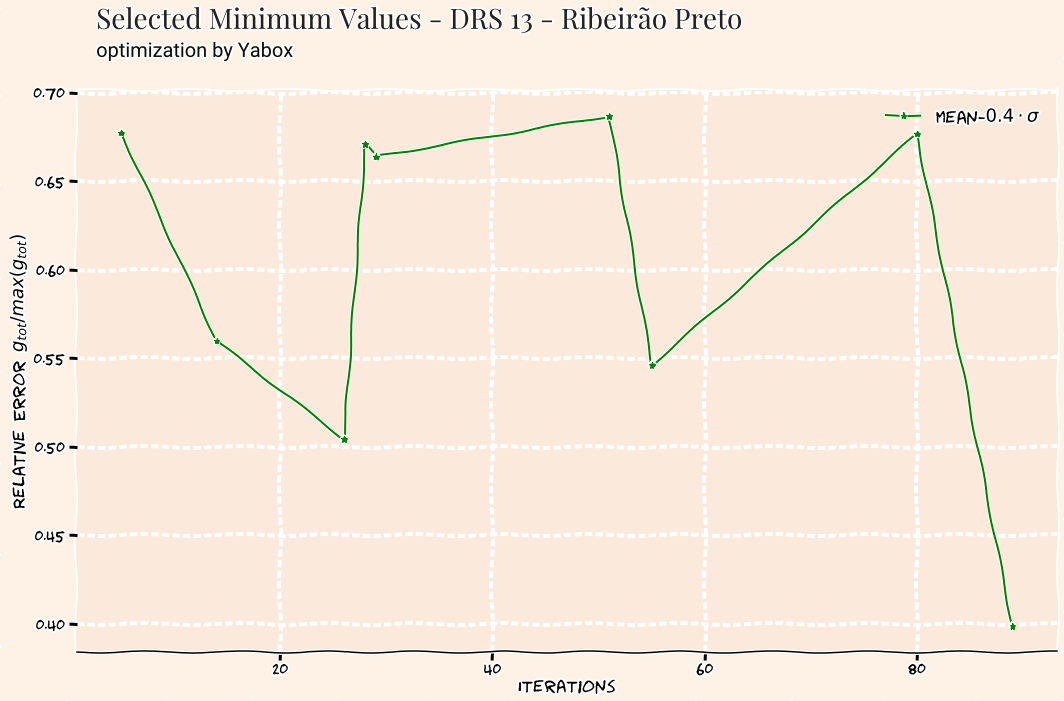

# Results for DRS 14 - São João da Boa Vista District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
41  329157.945866 2020-03-31            0  1797   0   0  0.7807  0.0326

## 5 Lowest Results DRS 14 - São João da Boa Vista District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
41  329157.945866 2020-03-31            0  1797   0   0  0.7807  0.0326
35  480018.317025 2020-04-01            0  2662   0   0  0.4558  0.0457
62  495391.153042 2020-03-31            0  1780   0   0  0.4200  0.0773
79  511689.137492 2020-03-31            0  2579   0   0  0.4806  0.0247
37  539490.601113 2020-04-01            0  2443   0   0  0.4978  0.0441

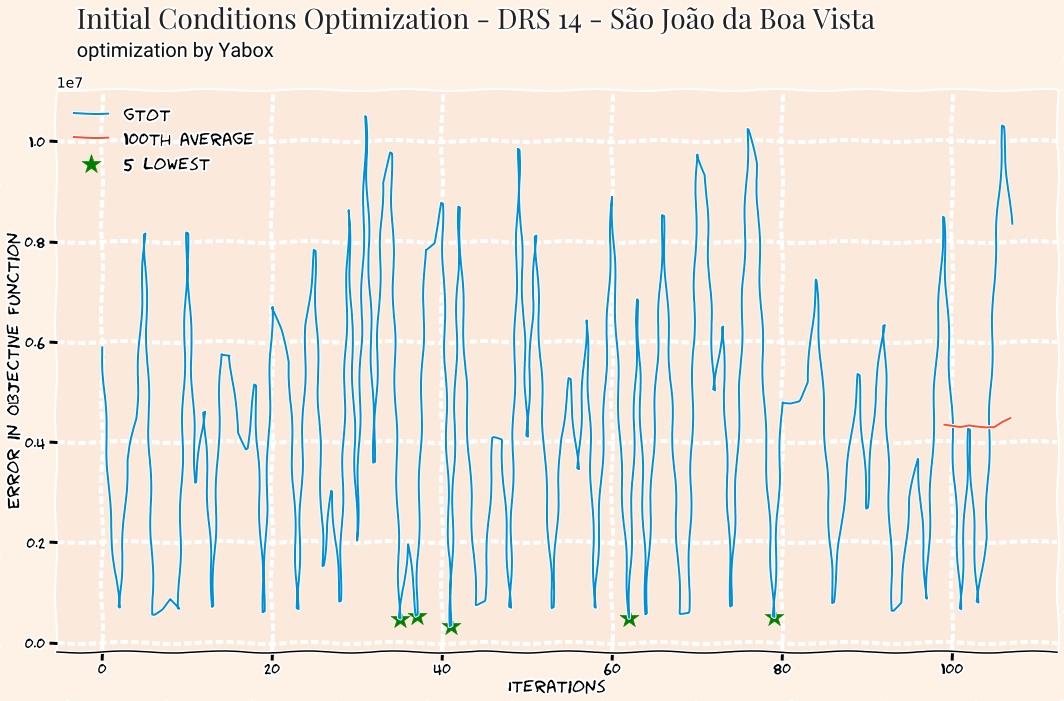

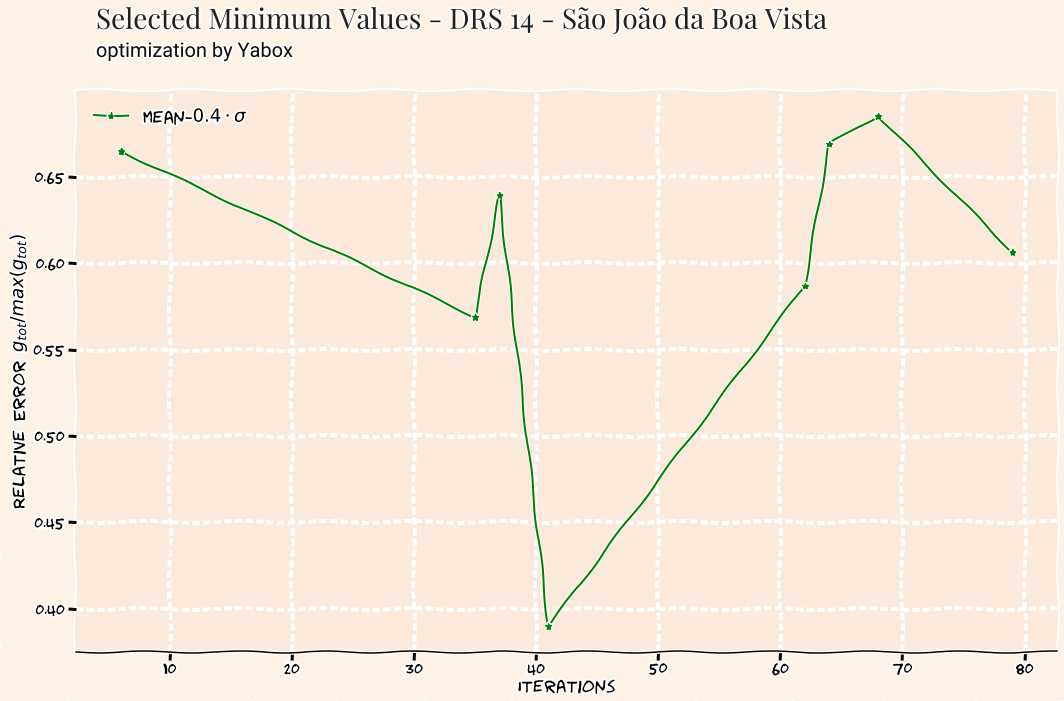

# Results for DRS 15 - São José do Rio Preto District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
25  6.344990e+06 2020-03-30            0  13666   0   0  0.3388  0.0368

## 5 Lowest Results DRS 15 - São José do Rio Preto District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
25  6.344990e+06 2020-03-30            0  13666   0   0  0.3388  0.0368
41  6.587220e+06 2020-03-30            0  11903   0   0  0.3336  0.0444
23  6.597946e+06 2020-03-30            0  10905   0   0  0.3244  0.0455
30  6.864591e+06 2020-03-31            0  14720   0   0  0.3785  0.0669
76  6.924999e+06 2020-04-02            0  12271   0   0  0.3526  0.0453

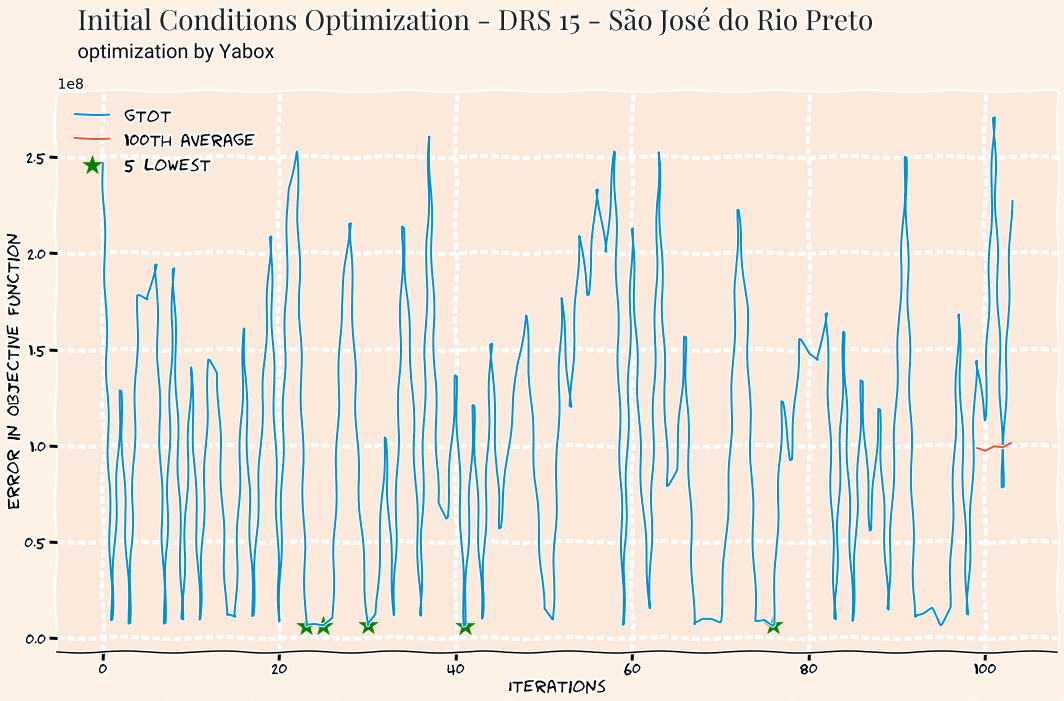

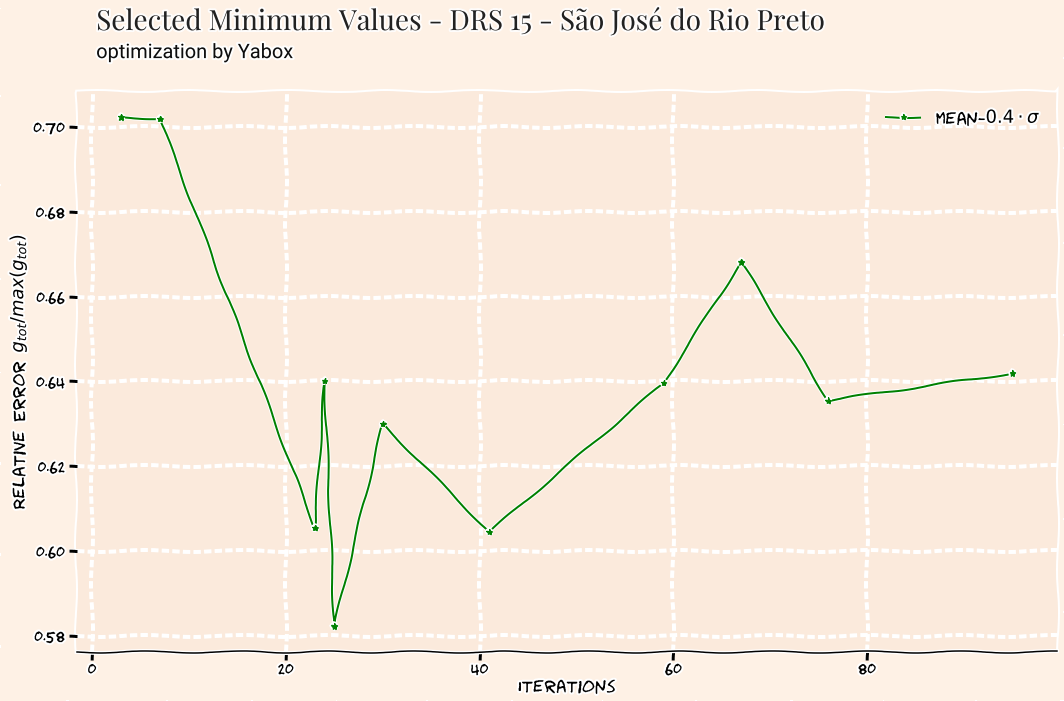

# Results for DRS 16 - Sorocaba District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1  7.407088e+06 2020-04-02            0  1622   1   0  0.3089  0.0699

## 5 Lowest Results DRS 16 - Sorocaba District Region

gtot  startdate  startNcases    s0  i0  d0  wcases    wrec
1    7.407088e+06 2020-04-02            0  1622   1   0  0.3089  0.0699
20   8.109985e+06 2020-03-31            0  1764   2   0  0.3474  0.0305
106  8.298044e+06 2020-04-02            0  1622   2   0  0.3089  0.0258
43   8.416129e+06 2020-04-01            0  1679   3   0  0.3443  0.0627
32   8.711198e+06 2020-04-01            0  1177   3   0  0.3005  0.0657

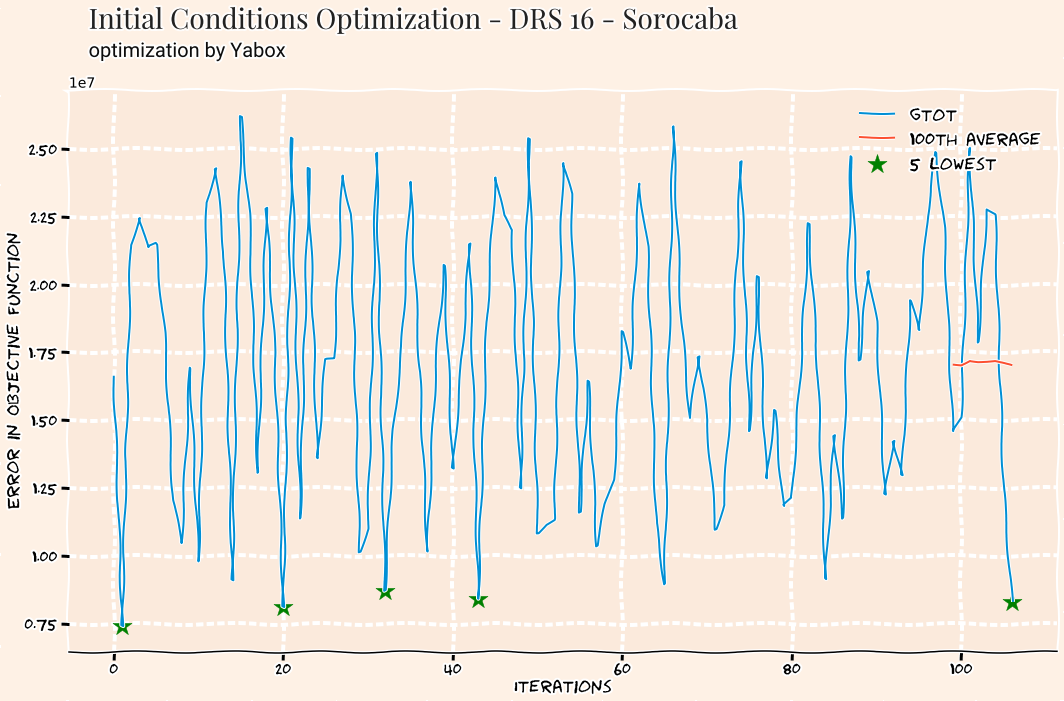

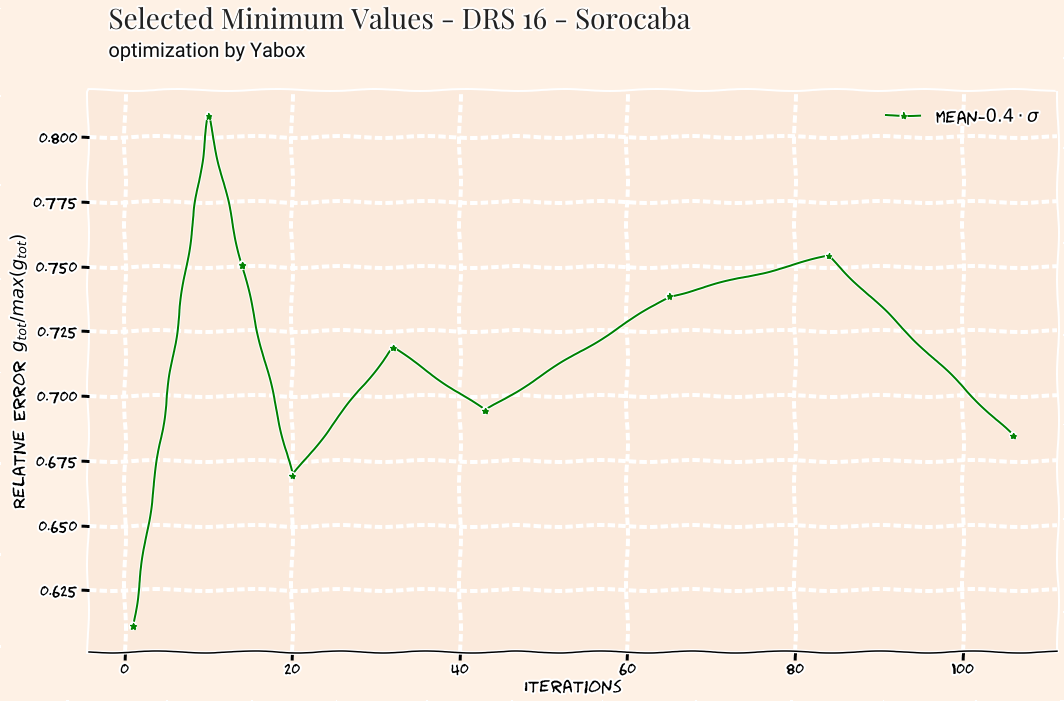

# Results for DRS 17 - Taubaté District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
23  4.241357e+06 2020-03-31            0  11815  19   2  0.3237  0.0243

## 5 Lowest Results DRS 17 - Taubaté District Region

gtot  startdate  startNcases     s0  i0  d0  wcases    wrec
23  4.241357e+06 2020-03-31            0  11815  19   2  0.3237  0.0243
82  9.809018e+06 2020-03-30            0   9230  25   2  0.6313  0.0358
45  9.925577e+06 2020-03-31            0  11557  30   0  0.7521  0.0322
53  1.121949e+07 2020-04-01            0  11862  18   2  0.7902  0.0411
55  2.926259e+07 2020-03-31            0   9160  18   1  0.4782  0.0543

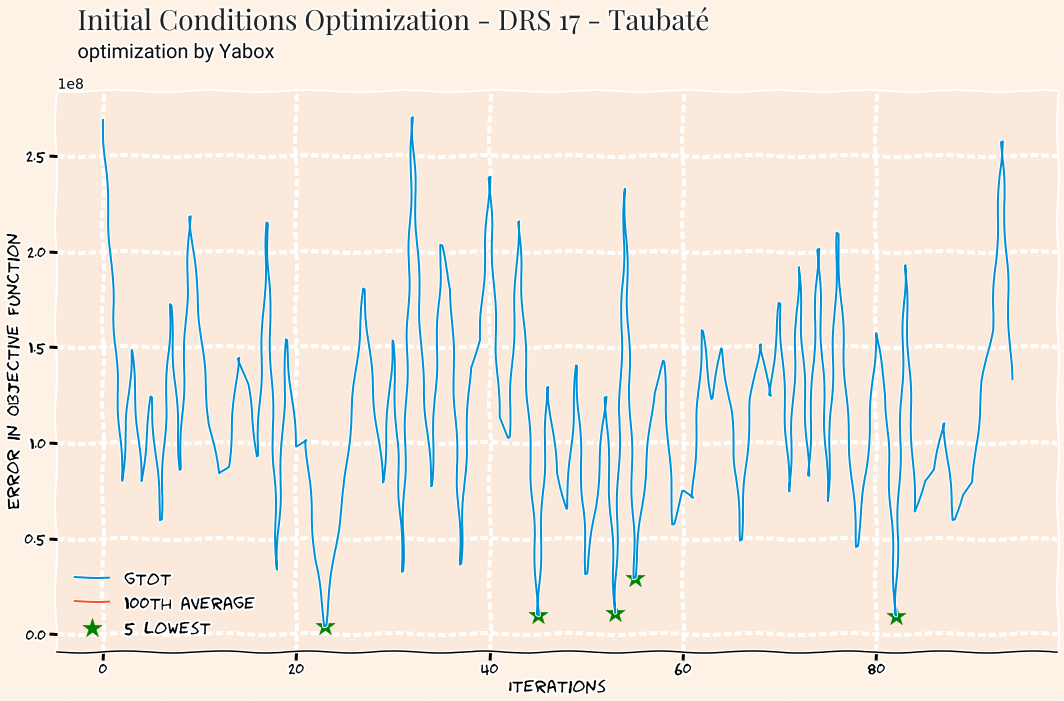

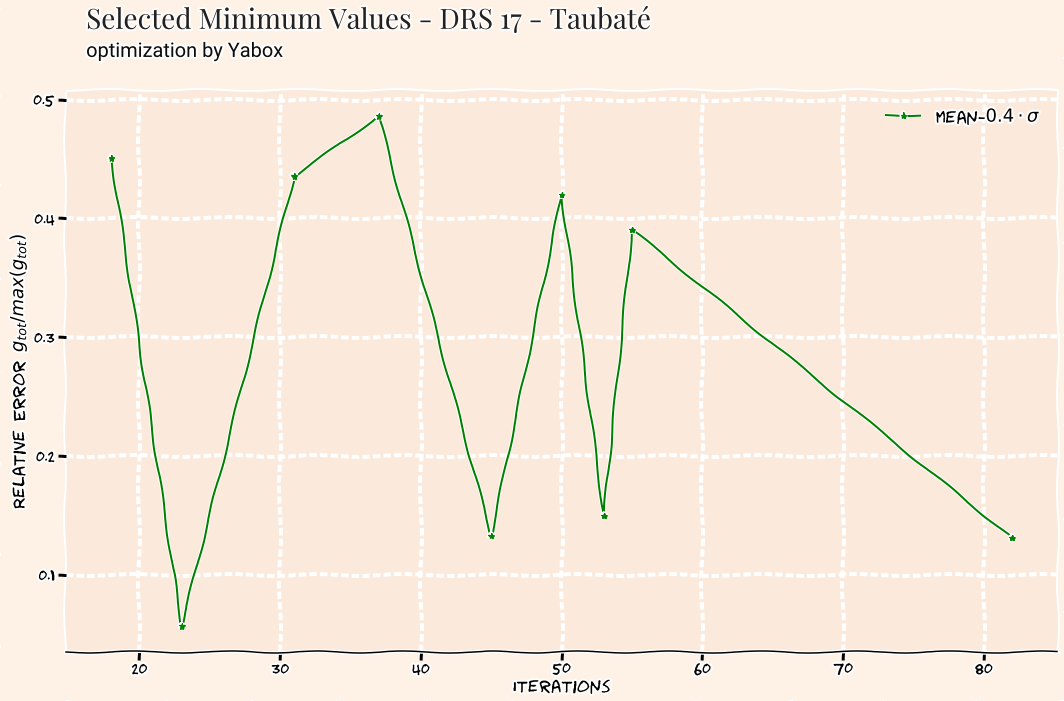

In [86]:
for districtRegion in DRS:
    versionStr=str(version)
    dateparse = lambda x: datetime.strptime(x, ' %Y-%m-%d')
    histOptAll= pd.read_table('./results/history_'+districtRegion+versionStr+'.csv', sep=",", \
                                index_col=0, header=None, parse_dates=[3], date_parser=dateparse,
        names = ["districtRegion","gtot",\
            "s0","startdate","i0","d0","startNcases","wcases","wrec"])
    histOptAll = histOptAll[['gtot', 'startdate','startNcases','s0',"i0","d0","wcases","wrec"]]
        
    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
    histOptAll = histOptAll.reset_index(drop=True)
    
    #format integers and decimal places
    histOptAll['d0'] = histOptAll['d0'].apply(lambda x: int(x+0.5))
    histOptAll['startNcases'] = histOptAll['startNcases'].apply(lambda x: int(x+0.5))
    histOptAll['s0'] = histOptAll['s0'].apply(lambda x: int(x+0.5))
    histOptAll['i0'] = histOptAll['i0'].apply(lambda x: int(x+0.5))
    histOptAll['wcases'] = histOptAll['wcases'].apply(lambda x: round(x,4))
    histOptAll['wrec'] = histOptAll['wrec'].apply(lambda x: round(x,4))
    
    #print optimum parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    display(Markdown("# Results for "+districtRegion+" District Region"))
    display(histOpt.iloc[:,0:8])
    histOpt.to_csv("data/vars_optimized_"+districtRegion+model+"HistMin.csv", sep=",", index=False)
        
    #current parameters
    query = dfparam.query('DRS == "{}"'.format(districtRegion)).reset_index()
    parameters = np.array(query.iloc[:, 2:])[0]
    date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec = parameters
        
    #query parameters
    j = query['index'].values[0]
    
    #define s0, i0 and d0
    dfparam.at[j, "s0"] = histOpt.s0
    dfparam['s0'] = dfparam['s0'].apply(lambda x: int(x+0.5))
    dfparam.at[j, "i0"] = histOpt.i0
    dfparam['i0'] = dfparam['i0'].apply(lambda x: int(x+0.5))
    dfparam.at[j, "d0"] = histOpt.d0
    dfparam.at[j, "START"] = histOpt.startNcases

    dfparam['d0'] = dfparam['d0'].apply(lambda x: int(x+0.5))
    
    #define Start N Cases
    dfparam['START'] = dfparam['START'].apply(lambda x: int(x+0.5))
    
    #define date, wcases, wrec
    dfparam.at[j, "start-date"] = histOpt.startdate.dt.strftime('%Y-%m-%d').values[0]
    dfparam.at[j, "WCASES"] = histOpt.wcases
    dfparam.at[j, "WREC"] = histOpt.wrec
    
    #save new parameters
    dfparam.to_csv("data/param_optimized_"+model+"_HistMin.csv", sep=",", index=False)
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Error in Objective Function", fontproperties=comic_font)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        #PLOTTING itself
        x=histOptAll.index
        y=histOptAll.gtot
        ax.plot(x,y, label="gtot")
        display(Markdown("## 5 Lowest Results "+districtRegion+" District Region"))
        histMin=histOptAll.nsmallest(5, ['gtot']).sort_values('gtot').iloc[:,0:8]
        display(histMin)

        ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='green',marker='*',s=400)
        histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Initial Conditions Optimization - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/convergence_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()
        
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        size=len(histOptAll)
        histMin=histOptAll.nsmallest(int(size*0.25+0.5), ['gtot']).sort_values('gtot').iloc[:,0:8]
        histMin.sort_index(inplace=True)
        
        histMin['error']=histMin.gtot/histMin.gtot.max()
        x=histMin.index[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        y=histMin.error[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        ax.plot(x, y, label="mean-$0.4 \cdot \sigma$",c='green',marker='*')
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font)
        plt.ylabel("Relative Error $g_{tot}/max(g_{tot})$", fontproperties=comic_font)

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Selected Minimum Values - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .85,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .95,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        ax.legend(frameon=False,prop=comic_font,fontsize=20)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.2)

        fig.tight_layout()
        strFile ='./results/minimumPoints_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()

In [87]:
display(Markdown("# Final Results for Initial Conditions"))
display(Markdown("## "+model+" optimization model"))

display(dfparam)

# Final Results for Initial Conditions

## Yabox optimization model

DRS  start-date  prediction-range       s0  \
0        DRS 01 - Grande São Paulo  2020-03-19               200  2392197   
1               DRS 02 - Araçatuba  2020-03-31               150      743   
2              DRS 03 - Araraquara  2020-04-02               150     2136   
3        DRS 04 - Baixada Santista  2020-03-31               150     8527   
4                DRS 05 - Barretos  2020-03-30               150     2691   
5                   DRS 06 - Bauru  2020-04-02               150    13039   
6                DRS 07 - Campinas  2020-04-01               150    25415   
7                  DRS 08 - Franca  2020-04-01               150     1044   
8                 DRS 09 - Marília  2020-04-01               150     5495   
9              DRS 10 - Piracicaba  2020-03-30               150    13658   
10    DRS 11 - Presidente Prudente  2020-03-31               150     1326   
11               DRS 12 - Registro  2020-04-01               150      907   
12         DRS 13 - Ribeirão Preto  2020-04-01               150     4027   
13  DRS 14 - São João da Boa Vista  2020-03-31               150     1797   
14  DRS 15 - São José do Rio Preto  2020-03-30               150    13666   
15               DRS 16 - Sorocaba  2020-04-02               150     1622   
16                DRS 17 - Taubaté  2020-03-31               150    11815   

        e0      a0    i0        r0   d0  START  RATIO  WCASES    WREC  
0   0.0001  0.0001  1456  300.0000  269      0   0.15  0.4498  0.0321  
1   0.0001  0.0001     0    0.0001    0      0   0.10  0.3667  0.0710  
2   0.0001  0.0001     0    0.0001    0      0   0.10  0.5902  0.0231  
3   0.0001  0.0001     0    0.0001    0      0   0.10  0.5257  0.0735  
4   0.0001  0.0001     0    0.0001    0      0   0.10  0.3185  0.0686  
5   0.0001  0.0001     2    0.0001    0      0   0.10  0.3072  0.0651  
6   0.0001  0.0001    61    0.0001    0      0   0.10  0.4167  0.0331  
7   0.0001  0.0001     0    0.0001    0      0   0.10  0.7238  0.0538  
8   0.0001  0.0001     0    0.0001    0      0   0.10  0.5739  0.0522  
9   0.0001  0.0001     0    0.0001    0      0   0.10  0.3415  0.0542  
10  0.0001  0.0001     0    0.0001    0      0   0.10  0.4432  0.0346  
11  0.0001  0.0001     0    0.0001    0      0   0.10  0.3971  0.0646  
12  0.0001  0.0001     0    0.0001    0      3   0.10  0.7627  0.0559  
13  0.0001  0.0001     0    0.0001    0      0   0.10  0.7807  0.0326  
14  0.0001  0.0001     0    0.0001    0      0   0.10  0.3388  0.0368  
15  0.0001  0.0001     1    0.0001    0      0   0.10  0.3089  0.0699  
16  0.0001  0.0001    19    0.0001    2      0   0.10  0.3237  0.0243